### 梯度的调试

一维场景：
红色点的位置为theta
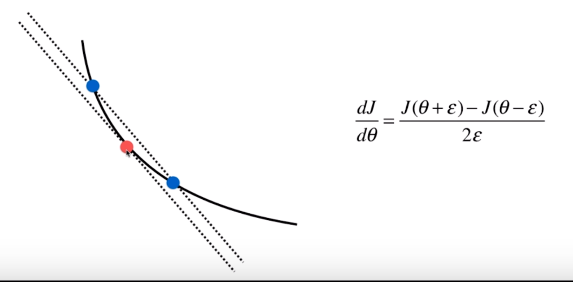

高维场景：
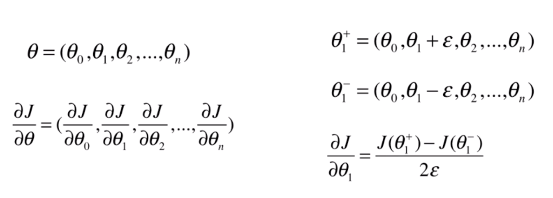

使用该方法求梯度，速度会慢很多。但可以对小批量的数据使用该方法求解梯度，得到正确的结果后。可以**利用该结果验证我们利用数学推导得到的梯度是否正确。**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
X = np.random.random(size=(1000, 10))

true_theta = np.arange(1, 12, dtype=float)
X_b = np.hstack([np.ones((len(X), 1)), X])
y = X_b.dot(true_theta) + np.random.normal(size=1000)

In [3]:
true_theta

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [4]:
X.shape

(1000, 10)

In [5]:
y.shape

(1000,)

In [6]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')

In [7]:
# 数学推导求梯度
def dJ_math(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(y)

In [8]:
# 调试梯度下降
def dJ_debug(theta, X_b, y, epsilon=0.01):
    res = np.empty(len(theta))
    for i in range(len(theta)):
        theta_1 = theta.copy()
        theta_1[i] += epsilon
        theta_2 = theta.copy()
        theta_2[i] -= epsilon
        res[i] = (J(theta_1, X_b, y) - J(theta_2, X_b, y)) / (2 * epsilon)
    return res

In [9]:
# 梯度下降
# dJ，表示传入求解梯度的方法
def gradient_descent(dJ, X_b, y, initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
    
    theta = initial_theta
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
            
        cur_iter += 1

    return theta

In [10]:
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

# 测试使用调试梯度下降
%time theta = gradient_descent(dJ_debug, X_b, y, initial_theta, eta)
theta

Wall time: 2.82 s


array([ 1.1251597 ,  2.05312521,  2.91522497,  4.11895968,  5.05002117,
        5.90494046,  6.97383745,  8.00088367,  8.86213468,  9.98608331,
       10.90529198])

In [11]:
# 测试使用数学推导求梯度
%time theta = gradient_descent(dJ_math, X_b, y, initial_theta, eta)
theta

Wall time: 382 ms


array([ 1.1251597 ,  2.05312521,  2.91522497,  4.11895968,  5.05002117,
        5.90494046,  6.97383745,  8.00088367,  8.86213468,  9.98608331,
       10.90529198])

### 结论

可以发现使用调试的方法求梯度速度比较慢。故该方法主要是用来进行验证。以免数学推导出错